In this assignment, you'll continue working with the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

Load the dataset from Thinkful's database. To connect to the database, use these credentials:
```
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'
```
The dataset needs some preprocessing. So, before working with the dataset, apply the following code:
```
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0,1, 0)
```
Here, `X` will represent your features and `y` will hold the labels. If `y` is equal to `1`, that indicates that the corresponding patient has heart disease. And if `y` is equal to `0`, then the patient doesn't have heart disease.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks below. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-resources/blob/master/clustering_module_solutions/5.solution_dbscan.ipynb).

1. Apply DBSCAN to the heart disease dataset by trying different values for the `eps` and `min_samples` parameters. You'll realize that it's really hard—if not impossible—to get a two-cluster solution using DBSCAN.
1. Apply DBSCAN by setting parameters `eps=1`, `min_samples=1`, `metric="euclidean"`. Then increase the value of `min_samples`. When you increase the value of `min_samples`, how does that affect the number of clusters that DBSCAN identifies?
1. Apply DBSCAN by setting parameters `eps=1`, `min_samples=1`, `metric="euclidean"`. Then increase the value of `eps`. When you increase the value of `eps`, how does that affect the number of clusters that DBSCAN identifies?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease', con = engine)
engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0,1, 0)

# Apply DBSCAN to the heart disease dataset by trying different values for the `eps` and `min_samples` parameters. You'll realize that it's really hard—if not impossible—to get a two-cluster solution using DBSCAN.

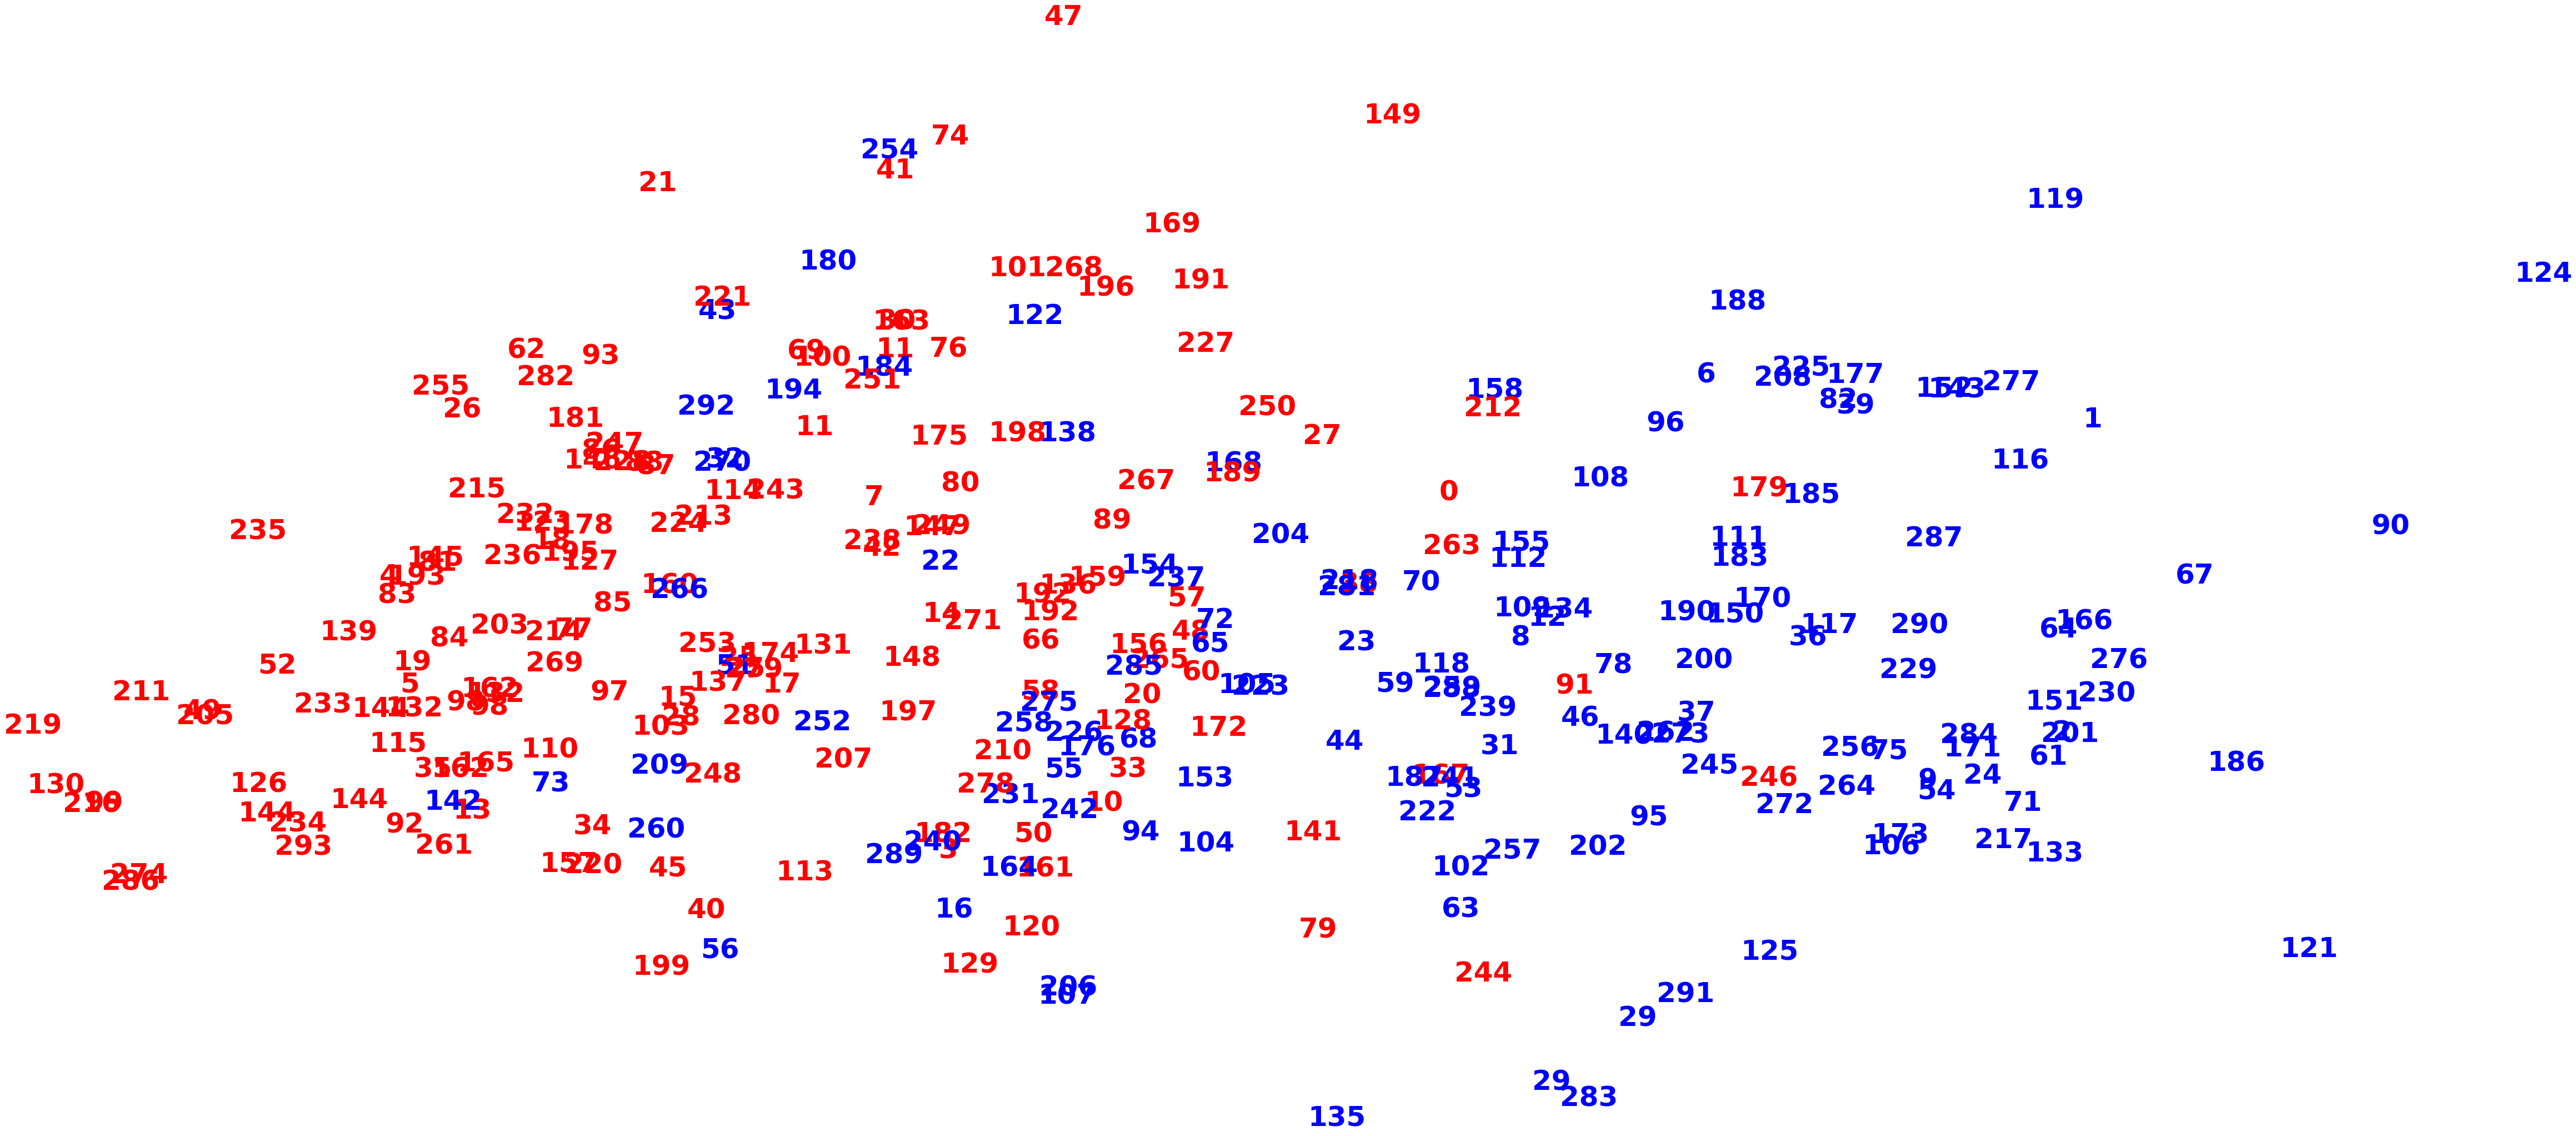

In [9]:
X_std = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps = 1, min_samples = 1, metric = "euclidean")
clusters = dbscan.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)
plt.figure(figsize=(10,5))

colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Apply DBSCAN by setting parameters `eps=1`, `min_samples=1`, `metric="euclidean"`. Then increase the value of `min_samples`. When you increase the value of `min_samples`, how does that affect the number of clusters that DBSCAN identifies?

In [10]:
min_samples_list = range(2, 10)

for i in range(2, 10):
    dbscan_cluster = DBSCAN(eps = 1, min_samples = i, metric = "euclidean")
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples = {}: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples = 2: 9
Number of clusters when min_samples = 3: 2
Number of clusters when min_samples = 4: 1
Number of clusters when min_samples = 5: 1
Number of clusters when min_samples = 6: 1
Number of clusters when min_samples = 7: 1
Number of clusters when min_samples = 8: 1
Number of clusters when min_samples = 9: 1


The number of clusters decreases as min_sample increases.

# Apply DBSCAN by setting parameters `eps=1`, `min_samples=1`, `metric="euclidean"`. Then increase the value of `eps`. When you increase the value of `eps`, how does that affect the number of clusters that DBSCAN identifies?

In [12]:
for i in range (1, 10):
    dbscan_cluster = DBSCAN(eps = i, min_samples = 1, metric = "euclidean")
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps = {}: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps = 1: 294
Number of clusters when eps = 2: 178
Number of clusters when eps = 3: 34
Number of clusters when eps = 4: 3
Number of clusters when eps = 5: 1
Number of clusters when eps = 6: 1
Number of clusters when eps = 7: 1
Number of clusters when eps = 8: 1
Number of clusters when eps = 9: 1


The number of clusters also decreases as eps increases.